In [18]:
## inspired by https://machinelearningmastery.com/expectation-maximization-em-algorithm/
import numpy as np
# start the machine
rng = np.random.default_rng()

# generate two samples
x1 = np.random.normal(20, 5, 3000)
x2 = np.random.normal(40, 5, 7000)
x = np.hstack((x1, x2))
print(x)

[23.03525137 13.52612498 18.77583614 ... 38.18901995 37.83896694
 34.11888273]


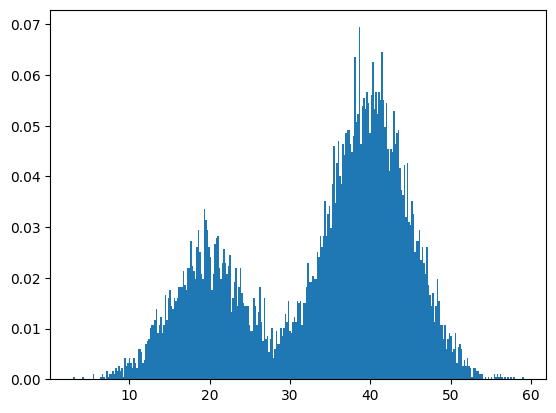

In [19]:
from matplotlib import pyplot
pyplot.hist(x, bins=300, density=True)
pyplot.show()



# Fully automatic with SK


In [20]:
## Using SciKitLearn's Mixture's Model Fit
## ... which does it own 
## Still inspired by https://machinelearningmastery.com/expectation-maximization-em-algorithm/

from sklearn.mixture import GaussianMixture
x = x.reshape((len(x), 1))
print(x)
# fit model
model = GaussianMixture(n_components=2, init_params='random')
model.fit(x)
# predict latent values
yhat = model.predict(x)
# check latent value for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[[23.03525137]
 [13.52612498]
 [18.77583614]
 ...
 [38.18901995]
 [37.83896694]
 [34.11888273]]
[0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
model

GaussianMixture(init_params='random', n_components=2)

In [22]:
model.weights_

array([0.49921877, 0.50078123])

In [23]:
len(X)

10000

# Manually follow coursebook

In [100]:
## let's accept K=2
## our parameters are thus
##   π[i] (weights), µ[i] (means), σ[i] (variances) (i=0..1)

import math

## the simple normal pdf
sqp = math.sqrt(2*math.pi)
def f(x, µ, σ):
    return 1/(σ*sqp) * math.exp( -1/2 * ((x-µ)/σ)**2 )

## We start with some nose-estimates, the variables with 1 are the new variables
π = [0.5, 0.5]
µ = [100,10]
σ = [20,20]
πnew = π.copy(); µnew = µ.copy(); σnew = σ.copy();
N = len(x); theindices = range(1,N)
r = [[1,1]]*N
print("N"); print(N)

## EM-algo: do E- and M-steps many times

for k in range(1,10):
    ## E-STEP
    ## Calc the "responsibilities"
    for i in theindices:
        summ = π[0] * f(x[i][0], µ[0], σ[0]) + π[1] * f(x[i][0], µ[1], σ[1])
        for j in range(0,2):
            r[i][j] = π[j] * f(x[i][0], µ[j], σ[j]) / summ
    
    ## print(r)
    
    ## M-STEP
    ## Adjust the π, µ, and σ
    NK=[0]*N
    for j in range(0,2):
        NK[j] = np.sum (np.fromiter((r[i][j] for i in theindices), float))
        # sum((lambda i: r[i][j]) for i in theindices)
        µnew[j] = np.sum((np.fromiter((r[i][j]*x[i][0] for i in theindices), float))) / NK[j]
        σnew[j] = 1/NK[j] * np.sum(np.fromiter((r[i][j]*((x[i][0]-µ[j])**2) for i in theindices), float))
        πnew[j] = NK[j]/ N
    
    print("   --- ")
    print(µnew)
    print(σnew)
    print(πnew)
    π = πnew.copy()
    µ = µnew.copy()
    σ = σnew.copy()





N
10000
0
1
   --- 
[33.99387026461292, 33.993870264612916]
[4466.184886765224, 685.0815343955486]
[0.009028027909043933, 0.9908719720909561]
0
1
   --- 
[33.99387026461293, 33.99387026461292]
[109.37572412047264, 109.37572412047263]
[0.0013955035480716041, 0.9985044964519282]
0
1
   --- 
[33.99387026461292, 33.99387026461292]
[109.37572412047264, 109.37572412047264]
[0.001395503548071604, 0.9985044964519282]
0
1
   --- 
[33.99387026461292, 33.99387026461292]
[109.37572412047265, 109.37572412047264]
[0.001395503548071604, 0.9985044964519282]
0
1
   --- 
[33.99387026461292, 33.99387026461292]
[109.37572412047263, 109.37572412047264]
[0.001395503548071604, 0.9985044964519282]
0
1
   --- 
[33.99387026461293, 33.99387026461292]
[109.37572412047264, 109.37572412047264]
[0.0013955035480716041, 0.9985044964519282]
0
1
   --- 
[33.99387026461293, 33.99387026461292]
[109.37572412047265, 109.37572412047264]
[0.001395503548071604, 0.9985044964519282]
0
1
   --- 
[33.99387026461292, 33.99387026461

In [48]:
np.sum(np.fromiter((t ** 2 for t in range(1, 6)),float))

55.0

[3, 2]